In [1]:
import requests
from rich import print as rPrint
import io
from PIL import Image
import matplotlib.pyplot as plt

### send a request to the api server

In [3]:

data = {
    # "model": "gpt-4",
    "message": "please give me a prompt only replay json format like {prompt:...}",
}


resource = requests.get("http://140.113.89.60:5000/chat", headers=data)


print(resource.text)


{
  "prompt": "Please provide information on the history of ancient Egypt."
}


#### use the prompt to generate a image

In [4]:

resource = requests.get("http://140.113.89.60:5000/generate", headers=resource.json())


def to_Image(data: bytes):
    image_io = io.BytesIO(data)

    return Image.open(image_io)


def plt_image(image):
    plt.imshow(image)
    plt.axis("off")  # Optionally, turn off the axis labels
    plt.show()



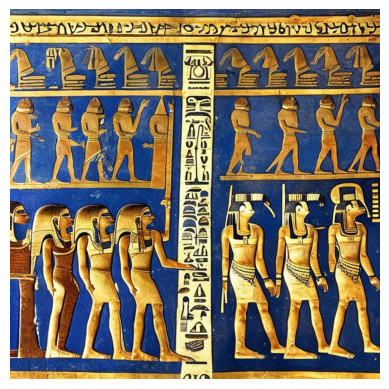

In [5]:

plt_image(to_Image(resource.content))
